# Musterlösung zur Übung zur Einführung in Pandas

### Import
**A.** Importieren Sie die notwendigen Bibliotheken, um mit Python-Datensätzen arbeiten und insbesondere auch SQLite Datenbanken einlesen zu können!

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.set_option('max_columns', 50)
# für SQLite
from pandas.io import sql
import sqlite3

### SQL Datenbank einlesen
**B.** Lesen Sie die Daten der in Chicago abgeschleppten Fahrzeuge aus der SQLite-Datenbank `data/towed.db` ein und sorgen Sie dabei dafür, dass das Datum in der `date`-Spalte auch als solches gelesen wird!

**Hinweise**
1. die Dokumentation zu `pandas.io.sql.read_sql()` findet man [hier](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_sql.html)
2. das `strftime`-kompatible Datumsformat ist hier `%m/%d/%Y`

In [2]:
conn = sqlite3.connect('data/towed.db')
query = "SELECT * FROM towed"
towed = sql.read_sql(query, con=conn, parse_dates={'date':'%m/%d/%Y'})

## Pandas und SQL
Die folgenden Aufgaben sollten Sie möglichst parallel mit SQL lösen, indem Sie z.B. die gerade eingelesene Datenbank mit einer SQLite GUI öffnen und entsprechende SQL-Statements ausführen! Das SQL-Äquivalent sollten Sie immer hier angeben!

### Überblick über die Daten
**C.** Schauen Sie zunächst 
1. die ersten 5 Datensätze,
2. dann die Datensätze 100 - 104 an und
3. informieren Sie sich dann über die *Struktur* des Datensatzes!

#### SQL-Äquivalent
```SQL
SELECT *
FROM towed
LIMIT 5;
```

In [3]:
towed.head()

,date,make,style,model,color,plate,state,towed_to,facility_phone,inventory_num
0,2014-11-18,FORD,LL,,BLK,S105053,IL,10300 S. Doty,(773) 568-8495,2750424
1,2014-11-18,HOND,4D,ACC,BLK,S415270,IL,400 E. Lower Wacker,(312) 744-7550,917129
2,2014-11-18,CHRY,VN,,SIL,V847641,IL,701 N. Sacramento,(773) 265-7605,6798366
3,2014-11-18,HYUN,4D,,SIL,N756530,IL,400 E. Lower Wacker,(312) 744-7550,917127
4,2014-11-18,TOYT,4D,,WHI,K702211,IL,400 E. Lower Wacker,(312) 744-7550,917128


#### SQL-Äquivalent
```SQL
SELECT * 
FROM towed
WHERE ROWID >= 100
  AND ROWID <= 104;
```

In [4]:
towed[99:105]  # da das Data Frame mit 0 startet ...

,date,make,style,model,color,plate,state,towed_to,facility_phone,inventory_num
99,2014-11-18,CHRY,4D,,WHI,V860615,IL,701 N. Sacramento,(773) 265-7605,6798306
100,2014-11-18,FORD,4D,,SIL,B9455,NB,10300 S. Doty,(773) 568-8495,2750400
101,2014-11-18,BMW,4D,,WHI,V960806,IL,400 E. Lower Wacker,(312) 744-7550,917087
102,2014-11-18,DODG,PK,TK,RED,1382871B,IL,10300 S. Doty,(773) 568-8495,2750398
103,2014-11-18,CHEV,4D,,TAN,V356714,IL,10300 S. Doty,(773) 568-8495,2750397
104,2014-11-18,BUIC,4D,,WHI,S941660,IL,10300 S. Doty,(773) 568-8495,2750396


#### SQL-Äquivalent
für MySQL:
```SQL
DESCRIBE towed;
```
für SQLite:
```SQL
PRAGMA table_info([towed]);
```

In [5]:
towed.info() # empty string showing up as non-null value

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5065 entries, 0 to 5064
Data columns (total 10 columns):
date              5065 non-null datetime64[ns]
make              5065 non-null object
style             5065 non-null object
model             5065 non-null object
color             5065 non-null object
plate             5065 non-null object
state             5065 non-null object
towed_to          5065 non-null object
facility_phone    5065 non-null object
inventory_num     5065 non-null int64
dtypes: datetime64[ns](1), int64(1), object(8)
memory usage: 395.8+ KB


In [6]:
towed.describe() # Statistiken für numerische Spalten (hier eigentlich sinnlos)

,inventory_num
count,5.065000e+03
mean,4.547865e+06
std,2.115626e+06
min,8.160000e+03
25%,2.747381e+06
50%,2.750197e+06
75%,6.795649e+06
max,6.798366e+06


### Erste Abfragen
**D.** Zeigen Sie die am 4.11.2014 abgeschleppten Fahrzeuge an

#### SQL-Äquivalent
```SQL
SELECT *
FROM towed
WHERE date = '2014-11-04';
```

In [7]:
towed[towed['date'] == '2014-11-04']

,date,make,style,model,color,plate,state,towed_to,facility_phone,inventory_num
1350,2014-11-04,LINC,LL,,GRN,V322831,IL,10300 S. Doty,(773) 568-8495,2749375
1351,2014-11-04,CHRY,VN,,BLU,7101535,IL,701 N. Sacramento,(773) 265-7605,6797250
1352,2014-11-04,PLYM,VN,TK,GRN,V144454,IL,701 N. Sacramento,(773) 265-7605,6797248
1353,2014-11-04,CHEV,VN,TK,BLK,K719308,IL,701 N. Sacramento,(773) 265-7605,6797246
1354,2014-11-04,CHEV,4D,IMP,SIL,UG5J2P,MO,701 N. Sacramento,(773) 265-7605,6797244
1355,2014-11-04,FORD,SW,,SIL,S860992,IL,10300 S. Doty,(773) 568-8495,2749362
1356,2014-11-04,DODG,VN,,RED,571R990,IL,701 N. Sacramento,(773) 265-7605,6797239
1357,2014-11-04,DODG,PK,TK,BRO,1381812,IL,10300 S. Doty,(773) 568-8495,2749364
1358,2014-11-04,ZCZY,2D,,BRO,,IL,10300 S. Doty,(773) 785-9752,1714849
1359,2014-11-04,CHEV,4D,,SIL,,,10300 S. Doty,(773) 568-8495,2749363


### Indexe
**E.** Benutzen Sie die Datumsspalte als Index!

In [8]:
towed.set_index('date', inplace=True)  # weiter towed benutzen

### Weitere Abfragen
**F.1.** Zeigen Sie die Informationen über die am 4.11.2014 abgeschleppten Fahrzeuge an (erste 5 Zeilen).

#### SQL-Äquivalent
```SQL
SELECT *
FROM towed
WHERE date = '2014-11-04'
LIMIT 5;
```

In [9]:
towed.loc['2014-11-04'].head()  # das Datum ist ja jetzt der Index

,make,style,model,color,plate,state,towed_to,facility_phone,inventory_num
date,,,,,,,,,
2014-11-04,LINC,LL,,GRN,V322831,IL,10300 S. Doty,(773) 568-8495,2749375
2014-11-04,CHRY,VN,,BLU,7101535,IL,701 N. Sacramento,(773) 265-7605,6797250
2014-11-04,PLYM,VN,TK,GRN,V144454,IL,701 N. Sacramento,(773) 265-7605,6797248
2014-11-04,CHEV,VN,TK,BLK,K719308,IL,701 N. Sacramento,(773) 265-7605,6797246
2014-11-04,CHEV,4D,IMP,SIL,UG5J2P,MO,701 N. Sacramento,(773) 265-7605,6797244


**F.2** Zeigen Sie das Datum und die Marken der am 4.11.2014 abgeschleppten Fahrzeuge an

#### SQL-Äquivalent
```SQL
SELECT date, make
FROM towed
WHERE date = '2014-11-04'
LIMIT 5;
```

In [10]:
towed.loc['2014-11-04', 'make']

date
2014-11-04    LINC
2014-11-04    CHRY
2014-11-04    PLYM
2014-11-04    CHEV
2014-11-04    CHEV
2014-11-04    FORD
2014-11-04    DODG
2014-11-04    DODG
2014-11-04    ZCZY
2014-11-04    CHEV
2014-11-04    CHEV
2014-11-04    OLDS
2014-11-04    OLDS
2014-11-04    LINC
2014-11-04    LINC
2014-11-04     ISU
2014-11-04    HYUN
2014-11-04    TOYT
2014-11-04    CHEV
2014-11-04    CHEV
2014-11-04     SAA
2014-11-04    PONT
2014-11-04    DODG
2014-11-04    NISS
2014-11-04    DODG
2014-11-04    OLDS
2014-11-04    PONT
2014-11-04    DODG
2014-11-04    FORD
2014-11-04    FORD
              ... 
2014-11-04    LINC
2014-11-04    TOYT
2014-11-04    TOYT
2014-11-04    MASE
2014-11-04    DODG
2014-11-04    NISS
2014-11-04    FORD
2014-11-04    FORD
2014-11-04    DODG
2014-11-04    PONT
2014-11-04    JEEP
2014-11-04    LINC
2014-11-04    FORD
2014-11-04    FORD
2014-11-04    DODG
2014-11-04    FORD
2014-11-04    SATR
2014-11-04    OLDS
2014-11-04    NISS
2014-11-04    FORD
2014-11-04    DODG
2014-11

**F.3** Zeigen Sie das Datum, die Marke, die Farbe und den Bundesstaat der abgeschleppten Fahrzeuge an (erste 5 Zeilen)

#### SQL-Äquivalent
```SQL
SELECT date, make, color, state
FROM towed
LIMIT 5;
```

In [11]:
cols = ['make', 'color', 'state'] # just passing a list
towed[cols][:5]

,make,color,state
date,,,
2014-11-18,FORD,BLK,IL
2014-11-18,HOND,BLK,IL
2014-11-18,CHRY,SIL,IL
2014-11-18,HYUN,SIL,IL
2014-11-18,TOYT,WHI,IL


### Filterbedingungen
**F.4** Zeigen Sie die abgeschleppten FORDs an (absteigend nach den Bundesstaaten geordnet)

#### SQL-Äquivalent
```SQL
SELECT *
FROM towed
WHERE make = 'FORD'
ORDER BY state DESC;
```

In [12]:
towed[towed['make'] == 'FORD'].sort_values(by='state', ascending=False).head()

,make,style,model,color,plate,state,towed_to,facility_phone,inventory_num
date,,,,,,,,,
2014-11-10,FORD,4D,,BLU,250WLU,WI,701 N. Sacramento,(773) 265-7605,6797787
2014-11-06,FORD,4D,,GRN,217WCX,WI,701 N. Sacramento,(773) 265-7605,6797379
2014-11-08,FORD,LL,,BLK,635FJE,WI,10300 S. Doty,(773) 568-8495,2749537
2014-10-19,FORD,LL,,BLK,178WDL,WI,10300 S. Doty,(773) 568-8495,464400
2014-10-06,FORD,2D,,ONG,198WJX,WI,701 N. Sacramento,(773) 265-7605,6794908


**F.5** Zeigen Sie alle schwarzen Abgeschleppten aus dem Staat **MI**chigan an!

#### SQL-Äquivalent
```SQL
SELECT *
FROM towed
WHERE color = 'BLK'
  AND state = 'MI';
```

In [13]:
towed[(towed.color == 'BLK') & (towed.state == 'MI')]

,make,style,model,color,plate,state,towed_to,facility_phone,inventory_num
date,,,,,,,,,
2014-11-12,DODG,LL,,BLK,CLV6160,MI,701 N. Sacramento,(773) 265-7605,6797946
2014-09-08,CHEV,2D,,BLK,3KMT29,MI,10300 S. Doty,(773) 568-8495,2745448
2014-08-27,KIA,4D,,BLK,DAN1057,MI,701 N. Sacramento,(773) 265-7605,6791554


**F.6** Zeigen Sie alle abgeschleppten **PORS**che oder **N**ew **Y**orker an (geordnet nach Marke (aufsteigend) und Farbe (absteigend))!

#### SQL-Äquivalent
```SQL
SELECT *
FROM towed
WHERE make = 'PORS'
  OR state = 'NY'
ORDER BY make, color DESC;
```

In [14]:
towed[(towed.make == 'PORS') | (towed.state == 'NY')].sort_values(by=['make', 'color'], ascending=[True, False])

,make,style,model,color,plate,state,towed_to,facility_phone,inventory_num
date,,,,,,,,,
2014-09-27,AUDI,4D,,SIL,EWA7707,NY,701 N. Sacramento,(773) 265-7605,6794421
2014-09-27,AUDI,4D,,SIL,EWA7707,NY,701 N. Sacramento,(773) 265-7605,6794421
2014-11-11,BUIC,LL,,WHI,GNW2480,NY,10300 S. Doty,(773) 568-8495,2749681
2014-10-08,PORS,LL,,RED,V515513,IL,701 N. Sacramento,(773) 265-7605,6795116
2014-11-01,PORS,LL,,BLK,V671447,IL,10300 S. Doty,(773) 568-8495,2749122
2014-09-25,PORS,LL,,BLK,,IL,701 N. Sacramento,(773) 265-7605,6794214
2014-09-19,PORS,LL,,BLK,V733398,IL,701 N. Sacramento,(773) 265-7605,6793740
2014-09-01,SUZI,4D,,GRY,EHL9836,NY,10300 S. Doty,(773) 568-8495,2744842


### Maskierung
**F.7** Legen Sie eine Filtermakske an für die Fahrzeuge mit 4D-Stil aus **IL**linnois!

#### SQL-Äquivalent
```SQL
CREATE VIEW m AS
SELECT *,
CASE WHEN style = '4D' AND state = 'IL' THEN 1
ELSE 0
END AS mask
FROM towed;
```

In [15]:
m = (towed['style'] == '4D') & (towed.state == 'IL')

**F.8** Stellen Sie fest, wie viele abgeschleppte Fahrzeuge die Bedingung erfüllen!

#### SQL-Äquivalent
```SQL
SELECT mask, COUNT(*)
FROM m
GROUP BY mask;
```

In [16]:
m.value_counts()

True     2570
False    2495
dtype: int64

**F.9** Zeigen Sie das Datum, den Hersteller, das Modell und die Farbe der in abgeschleppten 4D-Fahrzeuge aus Illinois an!

#### SQL-Äquivalent
```SQL
SELECT date, make, model, color
FROM m
WHERE mask = 1
LIMIT 5;

-- oder direkt
SELECT date, make, model, color
FROM towed
WHERE style = '4D' AND state = 'IL'
LIMIT 5;
```

In [17]:
towed[m][['make', 'model', 'color']].sort_index().head()

,make,model,color
date,,,
2014-08-20,BUIC,,GRY
2014-08-20,LEXS,,BLK
2014-08-21,NISS,,GRY
2014-08-21,HOND,,GRY
2014-08-21,PONT,,BLK


### Gruppierung
**G.1** Erzeugen Sie ein Objekt, welches die abgeschleppten Fahrzeuge nach Bundesstaaten gruppiert

In [18]:
by_state = towed.groupby('state')
by_state

**G.2** Zählen Sie die Werte in den einzelnen Spalten gemäß der Gruppierung (erste 5 Datensätze)!

#### SQL-Äquivalent
```SQL
SELECT state, 
  COUNT(make) AS make, COUNT(style) AS style, COUNT(model) AS model,
  COUNT(color) AS color, COUNT(plate) AS plate, COUNT(towed_to) AS towed_to,
  COUNT(facility_phone) AS facility_phone, COUNT(inventory_num) AS inventory_num
FROM towed
GROUP BY state
LIMIT 5;
```

In [19]:
by_state.count().head()

,make,style,model,color,plate,towed_to,facility_phone,inventory_num
state,,,,,,,,
,74,74,74,74,74,74,74,74
AL,2,2,2,2,2,2,2,2
AR,2,2,2,2,2,2,2,2
AZ,7,7,7,7,7,7,7,7
CA,6,6,6,6,6,6,6,6


**G.3** Zählen Sie die Anzahl der Datensätze gemäß der Gruppierung (letzte 5 Datensätze)!

#### SQL-Äquivalent
```SQL
SELECT state, COUNT(*)
FROM towed
GROUP BY state
ORDER BY state DESC
LIMIT 5;
```

In [20]:
by_state.size().tail()

state
TN     7
TX    18
VA     3
WA     3
WI    44
dtype: int64

**G.4** Zeigen Sie die 10 Staaten mit den meisten abgeschleppten *verschiedenen* Fahrzeugen an (`plate` identifiziert das Fahrzeug)!

#### SQL-Äquivalent
```SQL
SELECT state, COUNT(DISTINCT plate)
FROM towed
GROUP BY state
ORDER BY 2 DESC
LIMIT 10;
```

In [21]:
by_state.plate.nunique().sort_values(ascending=False)[:10]

state
IL    4301
IN     114
WI      44
MN      22
TX      18
MI      13
OH      11
GA       8
AZ       7
TN       7
Name: plate, dtype: int64

## Analyseaufgabe
Generieren Sie einen Datensatz / eine Tabelle mit den US-Bundesstaaten und deren Entfernung zu Chicago. Verbinden Sie diesen mit dem Datensatz / der Tabelle `towed`. Ermitteln Sie dann den Zusammenhang zwischen den Entfernungen und der Anzahl der abgeschleppten Fahrzeuge aus den einzelnen Staaten.

**Hinweise**
1. Sie können als Entfernungen der Staaten zu Chicago einfach die Entfernungen zwischen Chicago und den Hauptstädten der Bundesstaaten nehmen (oder eine andere sinnvolle Approximation)
2. Wenn Sie die Tabelle zunächst als Textdatei (csv) generieren, dann können Sie die sehr einfach sowohl in Python, asl auch in MySQL oder SQLite importieren und damit wieder SQL und Python parallel verwenden.

Die Beschreibung der Vorverarbeitung der Daten wurde ausgelagert in die Datei [chicago_dist.ipynb](chicago_dist.ipynb).

#### Einlesen der Distanzen

In [33]:
conn = sqlite3.connect('data/chicago_dist.db')
query = "SELECT * FROM state_to_chicago;"

chicago_dist = sql.read_sql(query, con=conn)
chicago_dist.head()

,state,distance
0,AK,2582.0
1,AL,619.0
2,AR,553.0
3,AZ,1454.0
4,CA,1803.0


#### Anzahlen in ein Data Frame wandeln
`by_state.size()` ist eine *Series*, die man aber mittels der Methode `to_frame()` umwandeln kann (siehe [hier](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.to_frame.html))

In [37]:
chicago_nmbtowed = by_state.size().to_frame()
chicago_nmbtowed.head()

,0
state,
,74
AL,2
AR,2
AZ,7
CA,6


#### Anpassungen des Data Frames
Offenbar ist zum einen `state` bei der Wandlung zum *Index* geworden (das machen wir rückgängig) und außerdem hat die zweite Spalte keinen vernünftigen Namen (das ändern wir).

In [38]:
chicago_nmbtowed.reset_index(inplace=True)
chicago_nmbtowed.head()

,state,0
0,,74
1,AL,2
2,AR,2
3,AZ,7
4,CA,6


In [51]:
chicago_nmbtowed.columns = ['state','nmbTowed']
chicago_nmbtowed.head(15)

,state,nmbTowed
0,,74
1,AL,2
2,AR,2
3,AZ,7
4,CA,6
5,CO,2
6,CT,2
7,DE,1
8,E1,6
9,FL,6


#### Zusammenführen der Data Frames
Jetzt führen wir die Data Frames zusammen. Dabei lassen wir Illinois weg, da natürlich die meisten abgeschleppten Fahrzeuge aus Chicago selbst (und damit aus Illinois) kommen.

In [56]:
df = pd.merge(chicago_dist[chicago_dist.state != 'IL'], chicago_nmbtowed, on='state', how='inner')
df.sort_values('nmbTowed', ascending=False).head(7)

,state,distance,nmbTowed
10,IN,118.0,116
34,WI,102.0,44
17,MN,354.0,22
31,TX,943.0,18
16,MI,182.0,13
26,OH,263.0,11
8,GA,587.0,8


#### Plotten
Schauen wir uns die Werte der Spalten `distance` und `nmbTowed` mal gegeneinander geplottet an.

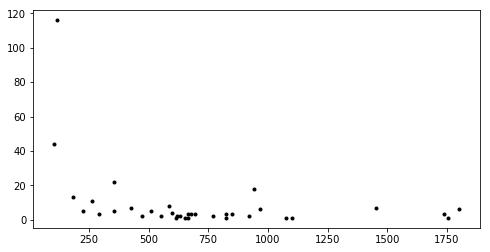

In [55]:
plt.figure(figsize=(8,4));
plt.plot(df['distance'], df['nmbTowed'], 'ok', ms=3);

### Fazit
Einen direkten Zusammenhang kann man nicht erkennen. Natürlich sind die Nachbarstaaten Indiana und Wisconsin relativ weit oben in der Anzahl der Abgeschleppten, aber auch das weiter entfernte Texas. Auch im Plot sieht man, dass immer mal wieder Ausreißer nach oben dabei sind. Vielleicht wäre es sinnvoll, die Anzahl der Abgeschleppten mit der *Einwohnerzahl* der Staaten zu gewichten ...? Das müsste man ggf. weiter untersuchen!